## Importing the Libraries

In [1]:
# Importing the Libraries for Data Preparation

import pandas as pd
import numpy as np

# Importing the Libraries for Data Preprocessing

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Importing Libraries for Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries for Model Building 

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

## Data Preparation / Data Preprocessing / Feature Engineering

In [2]:
# Reading the Data set
df = pd.read_csv('marketing_campaign.csv', sep="\t")


In [3]:
# Viewing the first 10 records of the Dataframe
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
# Viewing the shape of the dataframe 
df.shape

(2240, 29)

In [5]:
# Viewing the descriptive Stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
# Viewing the Info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

### Converting the Dt_Customer to date time format as its datatype is object

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_11380\177162232.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_11380\177162232.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_11380\177162232.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_11380\177162232.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_

In [9]:
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [10]:
# Checking for null Values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Deciding on dropping the Null Values
# Dropping the NUll Values

df.dropna(inplace = True)

In [12]:
df.shape

(2216, 29)

### Going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple,  I am taking this value relative to the most recent customer in the record.
### I.e max of date - enrollment date

In [13]:
final_dates = []
for i in df['Dt_Customer']:
    dates = i.date()
    final_dates.append(dates)
    
print(f'Maximum or the Highest Date recorded : {max(final_dates)}')

Maximum or the Highest Date recorded : 2014-12-06


### Creating a Feature Called __['Customer_For']__ of the number of days the customers started to shop in the store relative to the last recorded date

In [14]:
days = []
maximum_enroll_date = max(final_dates) 
for cust_enroll_date in final_dates:
    delta = maximum_enroll_date - cust_enroll_date
    days.append(delta)
df["Customer_For"] = days


In [15]:
df[['Customer_For']]

,Customer_For
0,971 days
1,125 days
2,472 days
3,65 days
4,321 days
...,...
2235,541 days
2236,61 days
2237,315 days
2238,316 days


In [16]:
# Converting the column into numerics
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [17]:
df[['Customer_For']]

,Customer_For
0,83894400000000000
1,10800000000000000
2,40780800000000000
3,5616000000000000
4,27734400000000000
...,...
2235,46742400000000000
2236,5270400000000000
2237,27216000000000000
2238,27302400000000000


In [18]:
# Creating the function for the bar visualization

def viz_bar(dataframe, x_value, hue_value):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data = dataframe, x = x_value, hue = hue_value)
  
    for container in ax.containers:
        ax.bar_label(container, label_type = 'edge')

    dataframe[x_value].value_counts()


In [19]:
# # Creating the function for the pie Visualzation

# def viz_pie(dataframe, col_value):
#     conversion_value = dataframe[col_value].value_counts()
#     labels = conversion_value.index 
#     print(conversion_value)
    
#     plt.pie(conversion_value, labels = labels, explode=[0.05] * labels, autopct='%.f%%', shadow=True)
#     plt.legend()
#     plt.show()"

### Complain: 1 if the customer complained in the last 2 years, 0 otherwise

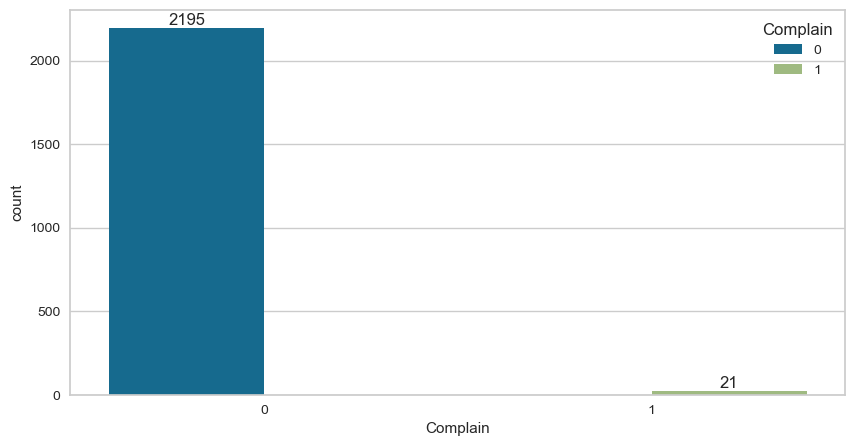

In [20]:
viz_bar(df, 'Complain', 'Complain')

### Seeing how the __Education__ is further Distributed 

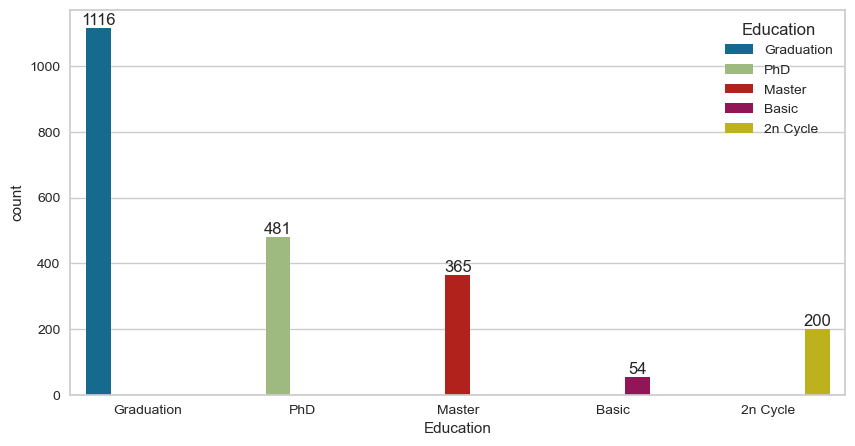

In [21]:
viz_bar(df, 'Education', 'Education')

### Seeing how the Marital status is distributed

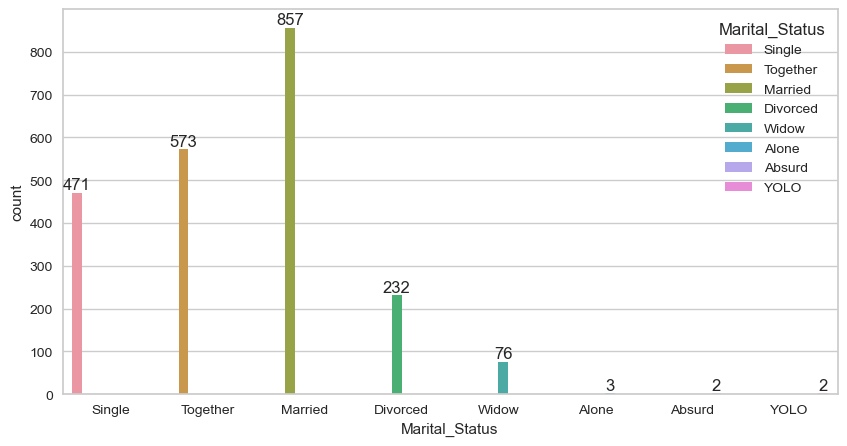

In [22]:
viz_bar(df, 'Marital_Status', 'Marital_Status')

### Seeing the Distribution of the KidHome

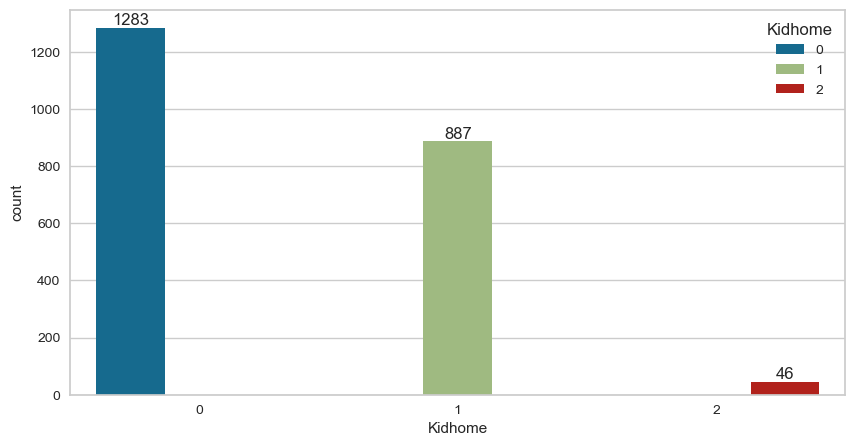

In [23]:
viz_bar(df, 'Kidhome', 'Kidhome')

### Seeing the Distribution of the TeenHome

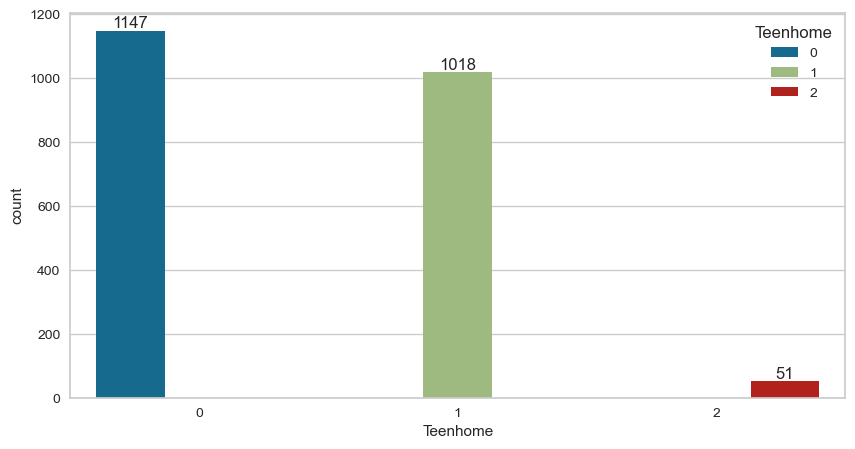

In [24]:
viz_bar(df, 'Teenhome', 'Teenhome')

### Distribution of AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

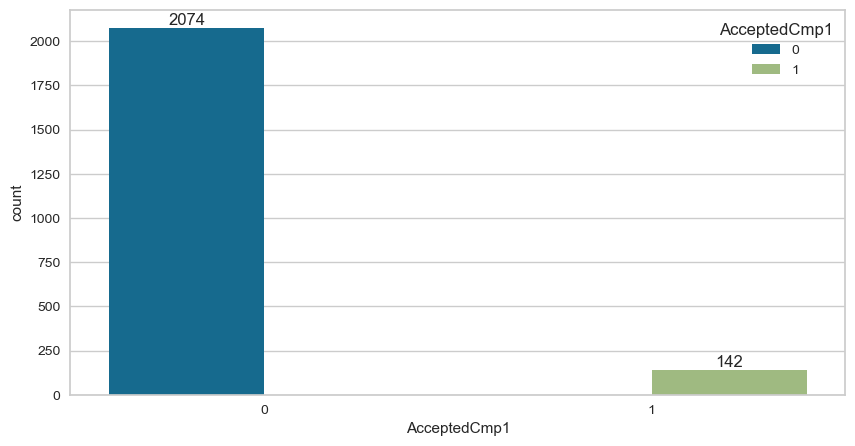

In [25]:
viz_bar(df, 'AcceptedCmp1', 'AcceptedCmp1')

### Distribution of AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


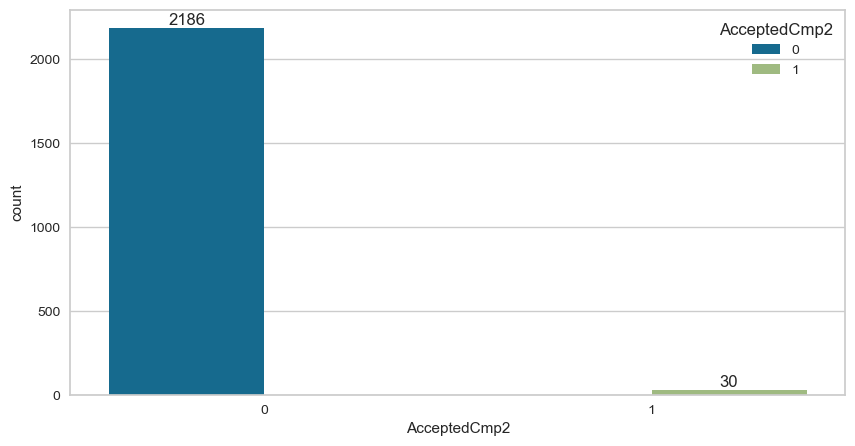

In [26]:
viz_bar(df, 'AcceptedCmp2', 'AcceptedCmp2')

### Distribution of AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise


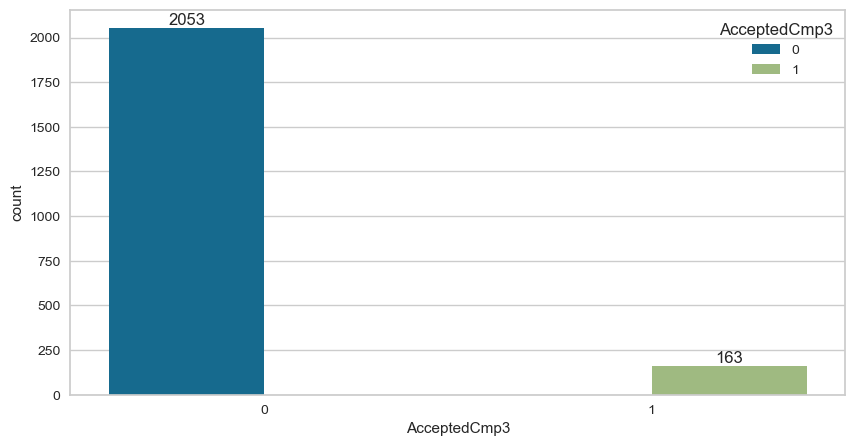

In [27]:
viz_bar(df, 'AcceptedCmp3', 'AcceptedCmp3')

### Distribution of AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise


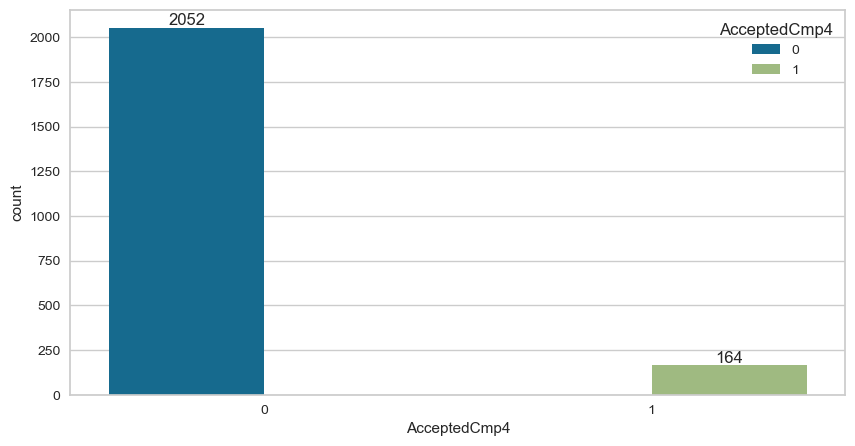

In [28]:
viz_bar(df, 'AcceptedCmp4', 'AcceptedCmp4')

### Distribution of AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


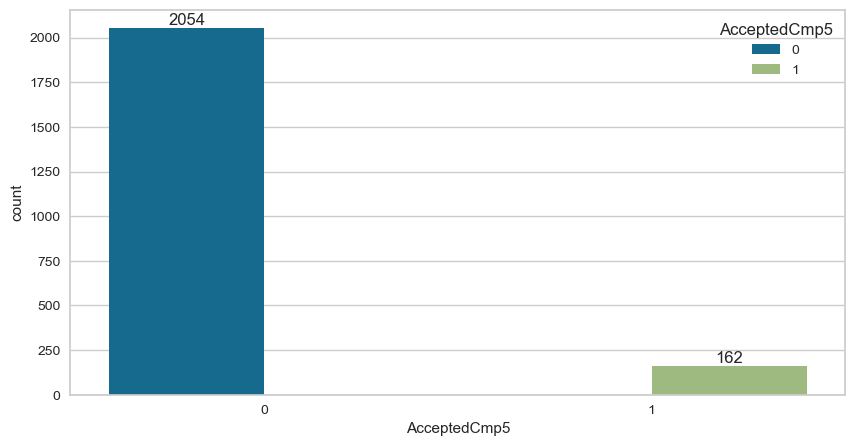

In [29]:
viz_bar(df, 'AcceptedCmp5', 'AcceptedCmp5')

### Distribution of Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


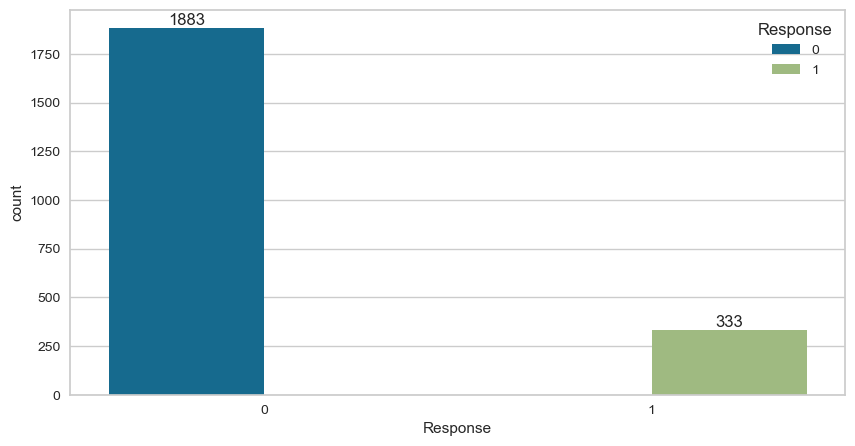

In [30]:
viz_bar(df, 'Response', 'Response')

In [31]:
df.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,2012-04-09 00:00:00,2014-08-03 00:00:00,2013-08-21 00:00:00
Recency,58,38,26
MntWines,635,11,426


In [32]:
df['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [33]:
df['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

### Feature Engineering

In [34]:
# Creating the Age of the customer

df['Age'] = 2024 - df['Year_Birth']
df[['Age']].head(5)

,Age
0,67
1,70
2,59
3,40
4,43


In [35]:
# Total Spending on various Items

df['Spent'] = df['MntWines'] + df['MntSweetProducts'] + df['MntMeatProducts'] 
+ df['MntGoldProds'] + df['MntFruits'] + df['MntFishProducts']
    
df[['Spent']].head(5)

,Spent
0,1269
1,18
2,574
3,34
4,318


In [36]:
# Living Sattus Extracted from the Marital Status of the customers

df['Living_With'] = df['Marital_Status'].replace({'Married' : 'Couple', 'Together' : 'Couple', 'Absurd' : 'Alone',
                                                 'Widow' : 'Alone', 'YOLO' : 'Alone', 'Single' : 'Alone',
                                                  'Divorced' : 'Alone'})
df['Living_With'].value_counts()

Couple    1430
Alone      786
Name: Living_With, dtype: int64

In [37]:
# Feature indicating total children living in the household

df['Children'] = df['Kidhome'] + df['Teenhome']

df['Children'].value_counts()

1    1117
0     633
2     416
3      50
Name: Children, dtype: int64

In [38]:
# Feature for total members in the household

df['Family_Size'] = df['Living_With'].replace({'Alone' : 1, 'Couple': 2}) + df['Children']
df[['Family_Size']].head(5)

,Family_Size
0,1
1,3
2,2
3,3
4,3


In [39]:
# Feature pertaining parenthood
df['Is_Parent'] = np.where(df.Children> 0, 1, 0)
df[['Is_Parent']].head(5)

,Is_Parent
0,0
1,1
2,0
3,1
4,1


In [40]:
# Segmenting education levels in three groups

df['Education'] = df['Education'].replace({'Basic' : 'Undergraduate', '2n Cycle' : 'Undergraduate', 
                                          'Graduation' : 'Graduate', 'Master' : 'PostGraduate',
                                          'PhD' : 'PostGraduate'})

df['Education'].value_counts()


Graduate         1116
PostGraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [41]:
# For Clarity

df = df.rename(columns = {'MntWines' : 'Wines', 'MntFruits' : 'Fruits', 'MntMeatProducts' : 'Meat', 
                          'MntFishProducts' : 'Fish', 'MntSweetProducts' : 'Sweets', 'MntGoldProds' : 'Gold'})
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [42]:
# Dropping the Redundant Features

df.drop(['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'],
       axis = 1, inplace = True)

In [43]:
df.shape

(2216, 30)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02


In [45]:
# Functions for histogram and box plots

def viz_box_hist(dataframe, x_value):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the histogram on the first axis (axes[0])
    sns.histplot(data = dataframe, x = x_value, ax = axes[0], kde = True)
    axes[0].set_title(str(x_value) + ' Distribution (Histogram)')
    
    # Plot the box plot on the second axis (axes[1])
    sns.boxplot(data = dataframe, x = x_value, ax = axes[1])
    axes[1].set_title(str(x_value) + ' Distribution (Boxplot)')

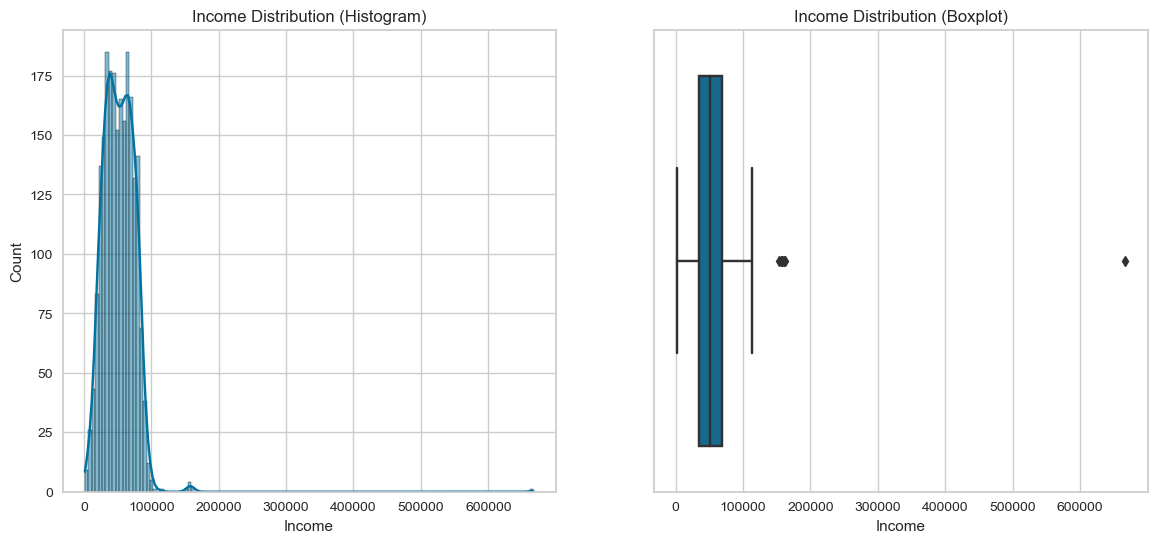

In [46]:
viz_box_hist(df, 'Income')

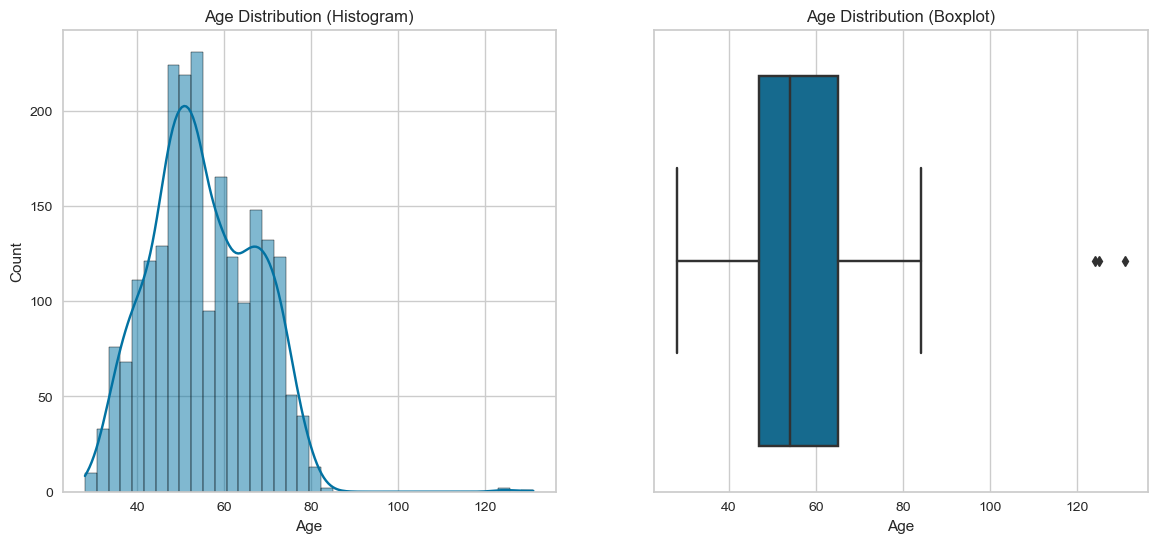

In [47]:
viz_box_hist(df, 'Age')

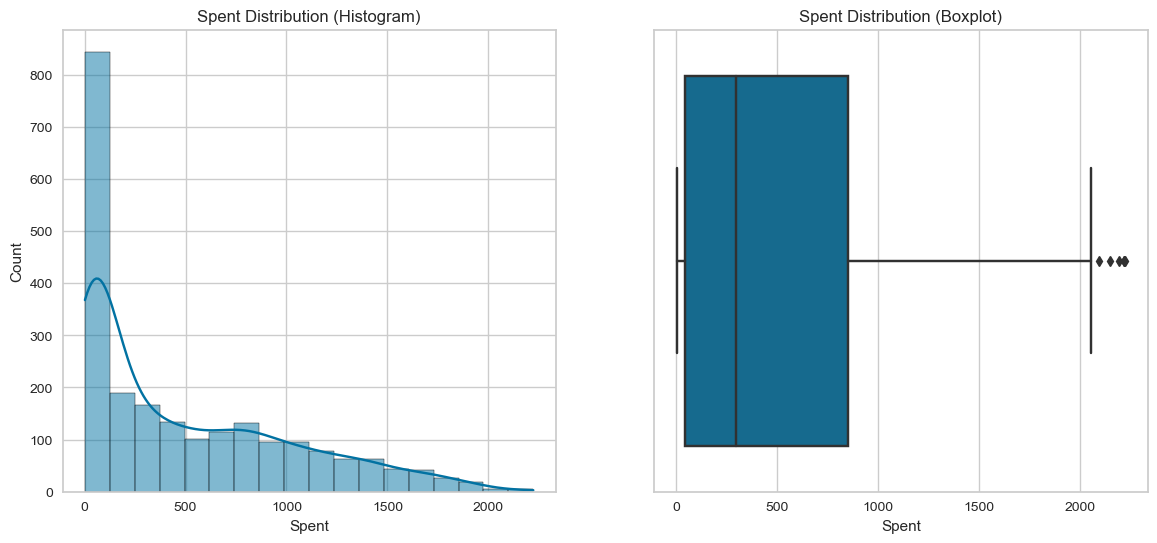

In [48]:
viz_box_hist(df, 'Spent')

In [49]:
# There sre outliers in age and income So we will be capping the data frame inorder to remove the outliers

print(f'The No. Records before Outlier Removal : {df.shape}')

df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]

print(f'The No. Records after Outlier Removal : {df.shape}')

The No. Records before Outlier Removal : (2216, 30)
The No. Records after Outlier Removal : (2212, 30)


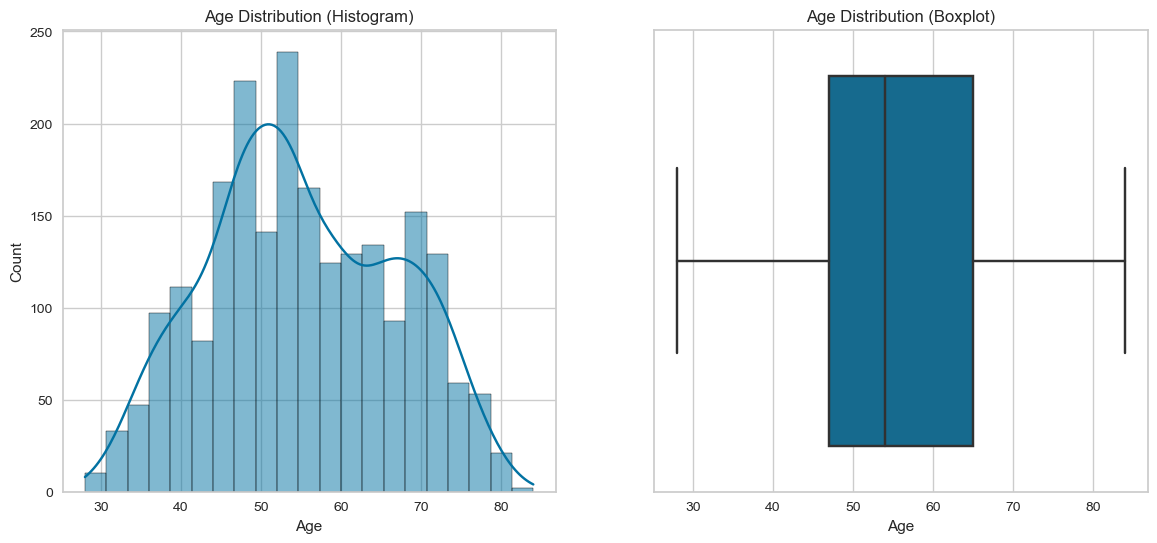

In [50]:
viz_box_hist(df, 'Age')

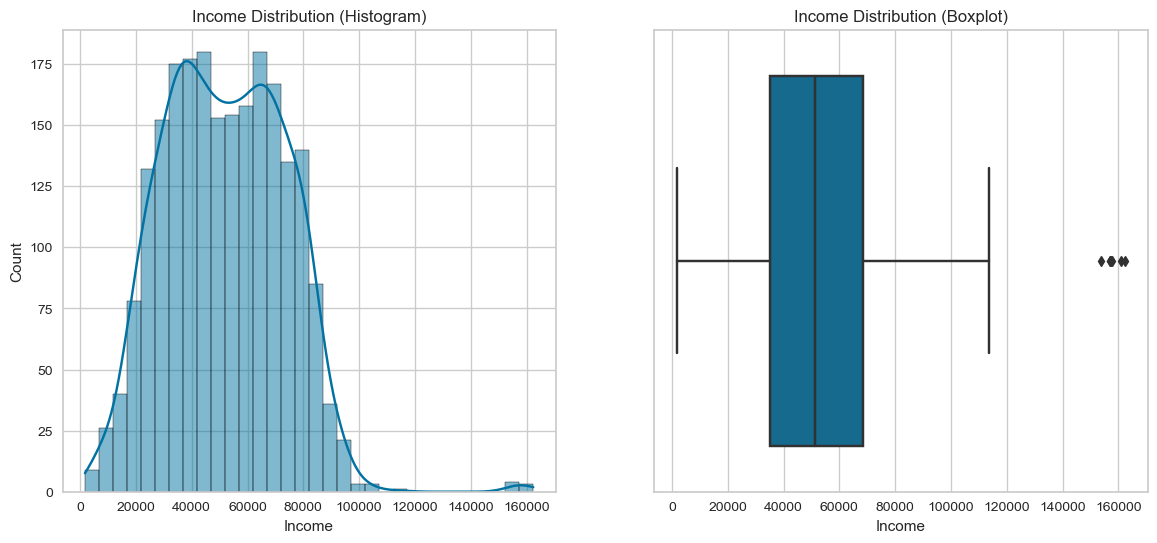

In [51]:
viz_box_hist(df, 'Income')

In [52]:
numeric_columns_name = df.select_dtypes(include = ['number']).columns
for index, num_col_name in enumerate(numeric_columns_name):
    print(index, num_col_name)

0 Income
1 Kidhome
2 Teenhome
3 Recency
4 Wines
5 Fruits
6 Meat
7 Fish
8 Sweets
9 Gold
10 NumDealsPurchases
11 NumWebPurchases
12 NumCatalogPurchases
13 NumStorePurchases
14 NumWebVisitsMonth
15 AcceptedCmp3
16 AcceptedCmp4
17 AcceptedCmp5
18 AcceptedCmp1
19 AcceptedCmp2
20 Complain
21 Response
22 Customer_For
23 Age
24 Spent
25 Children
26 Family_Size
27 Is_Parent


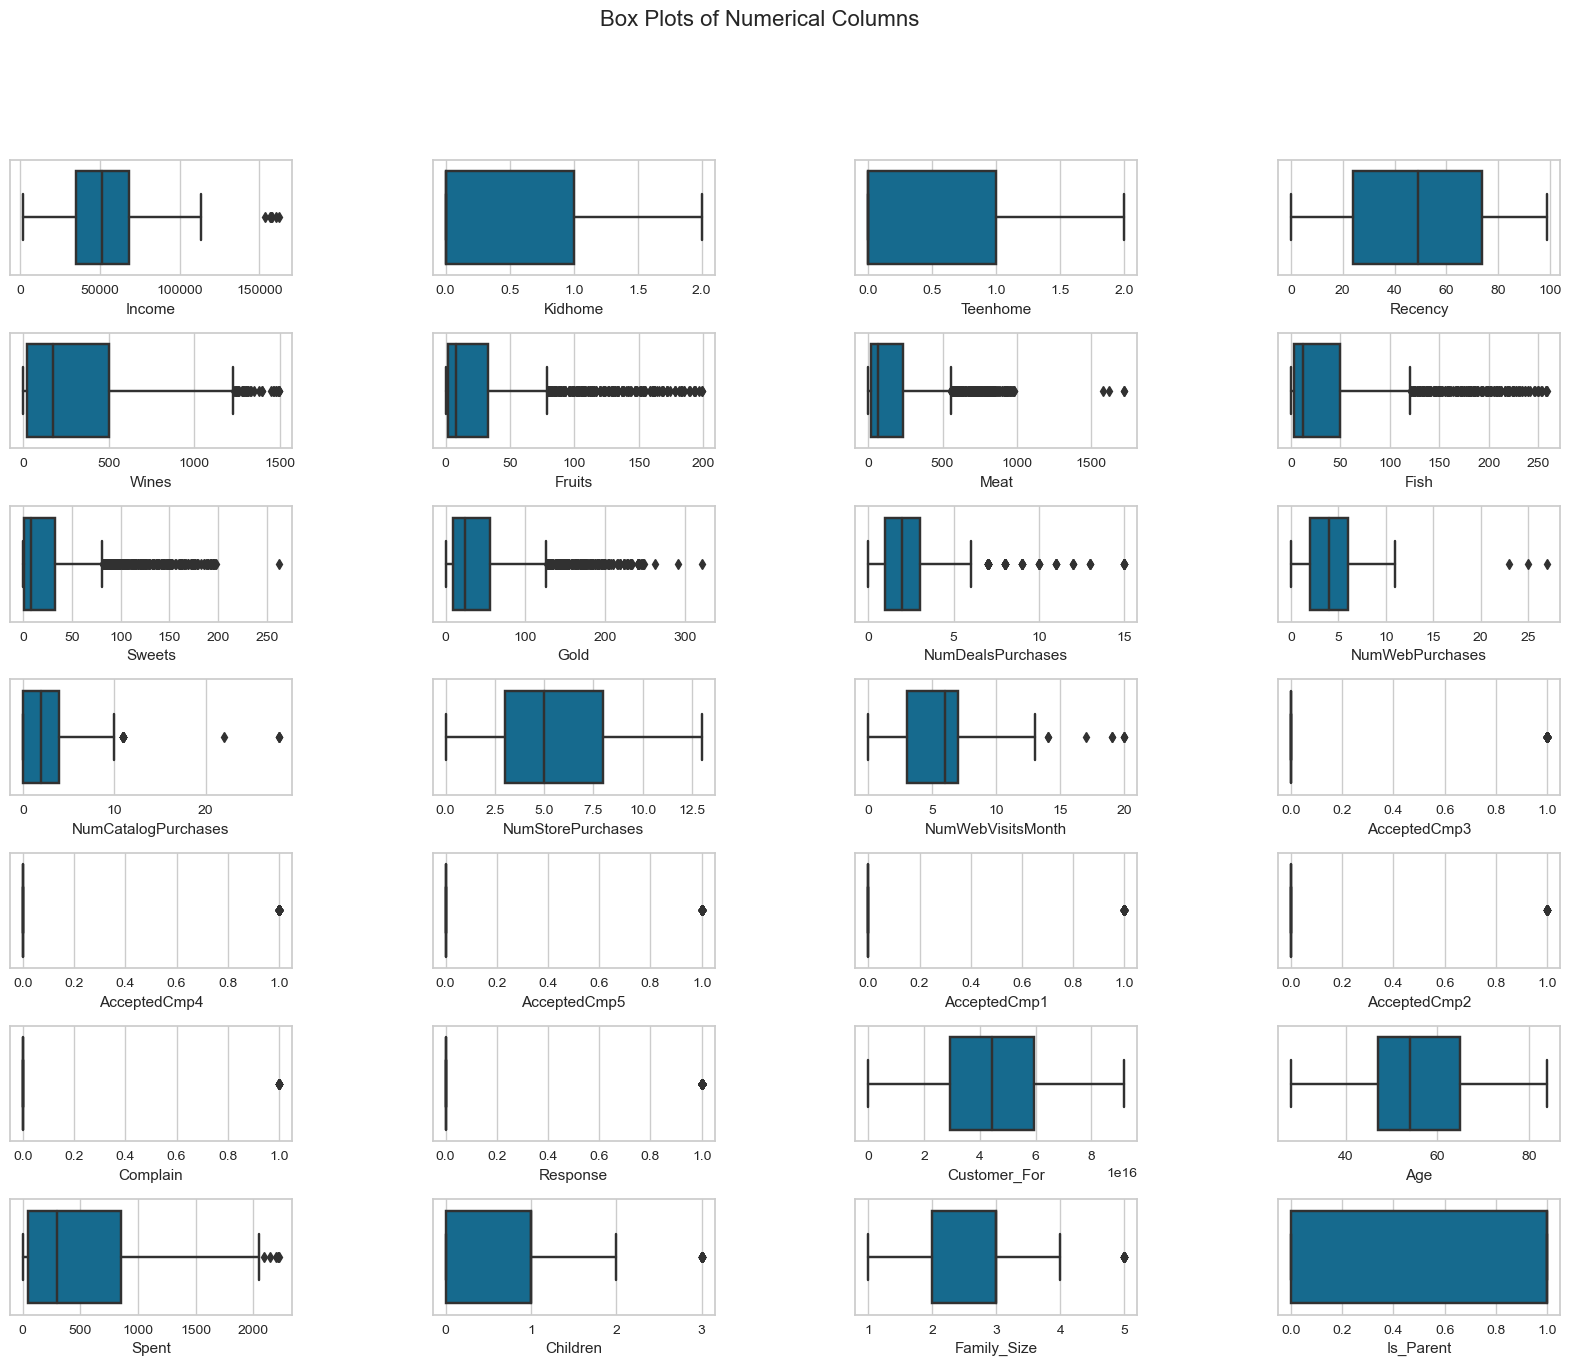

In [53]:
# Determine the number of columns for the subplots grid
n_cols = 4  # Adjust based on how many plots you want in a row
n_rows = (len(numeric_columns_name) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Creating a figure with subplots, arranged in a grid
fig, ax = plt.subplots(n_rows, n_cols, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)  # Adjust spacing between plots

# Loop through each numerical column to create individual box plots
for i, col in enumerate(numeric_columns_name):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x = col, data = df, ax = ax[row, col_pos])

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

# Adding a title to the figure
fig.suptitle('Box Plots of Numerical Columns', fontsize=16)

plt.show()

### Correlation Heat map

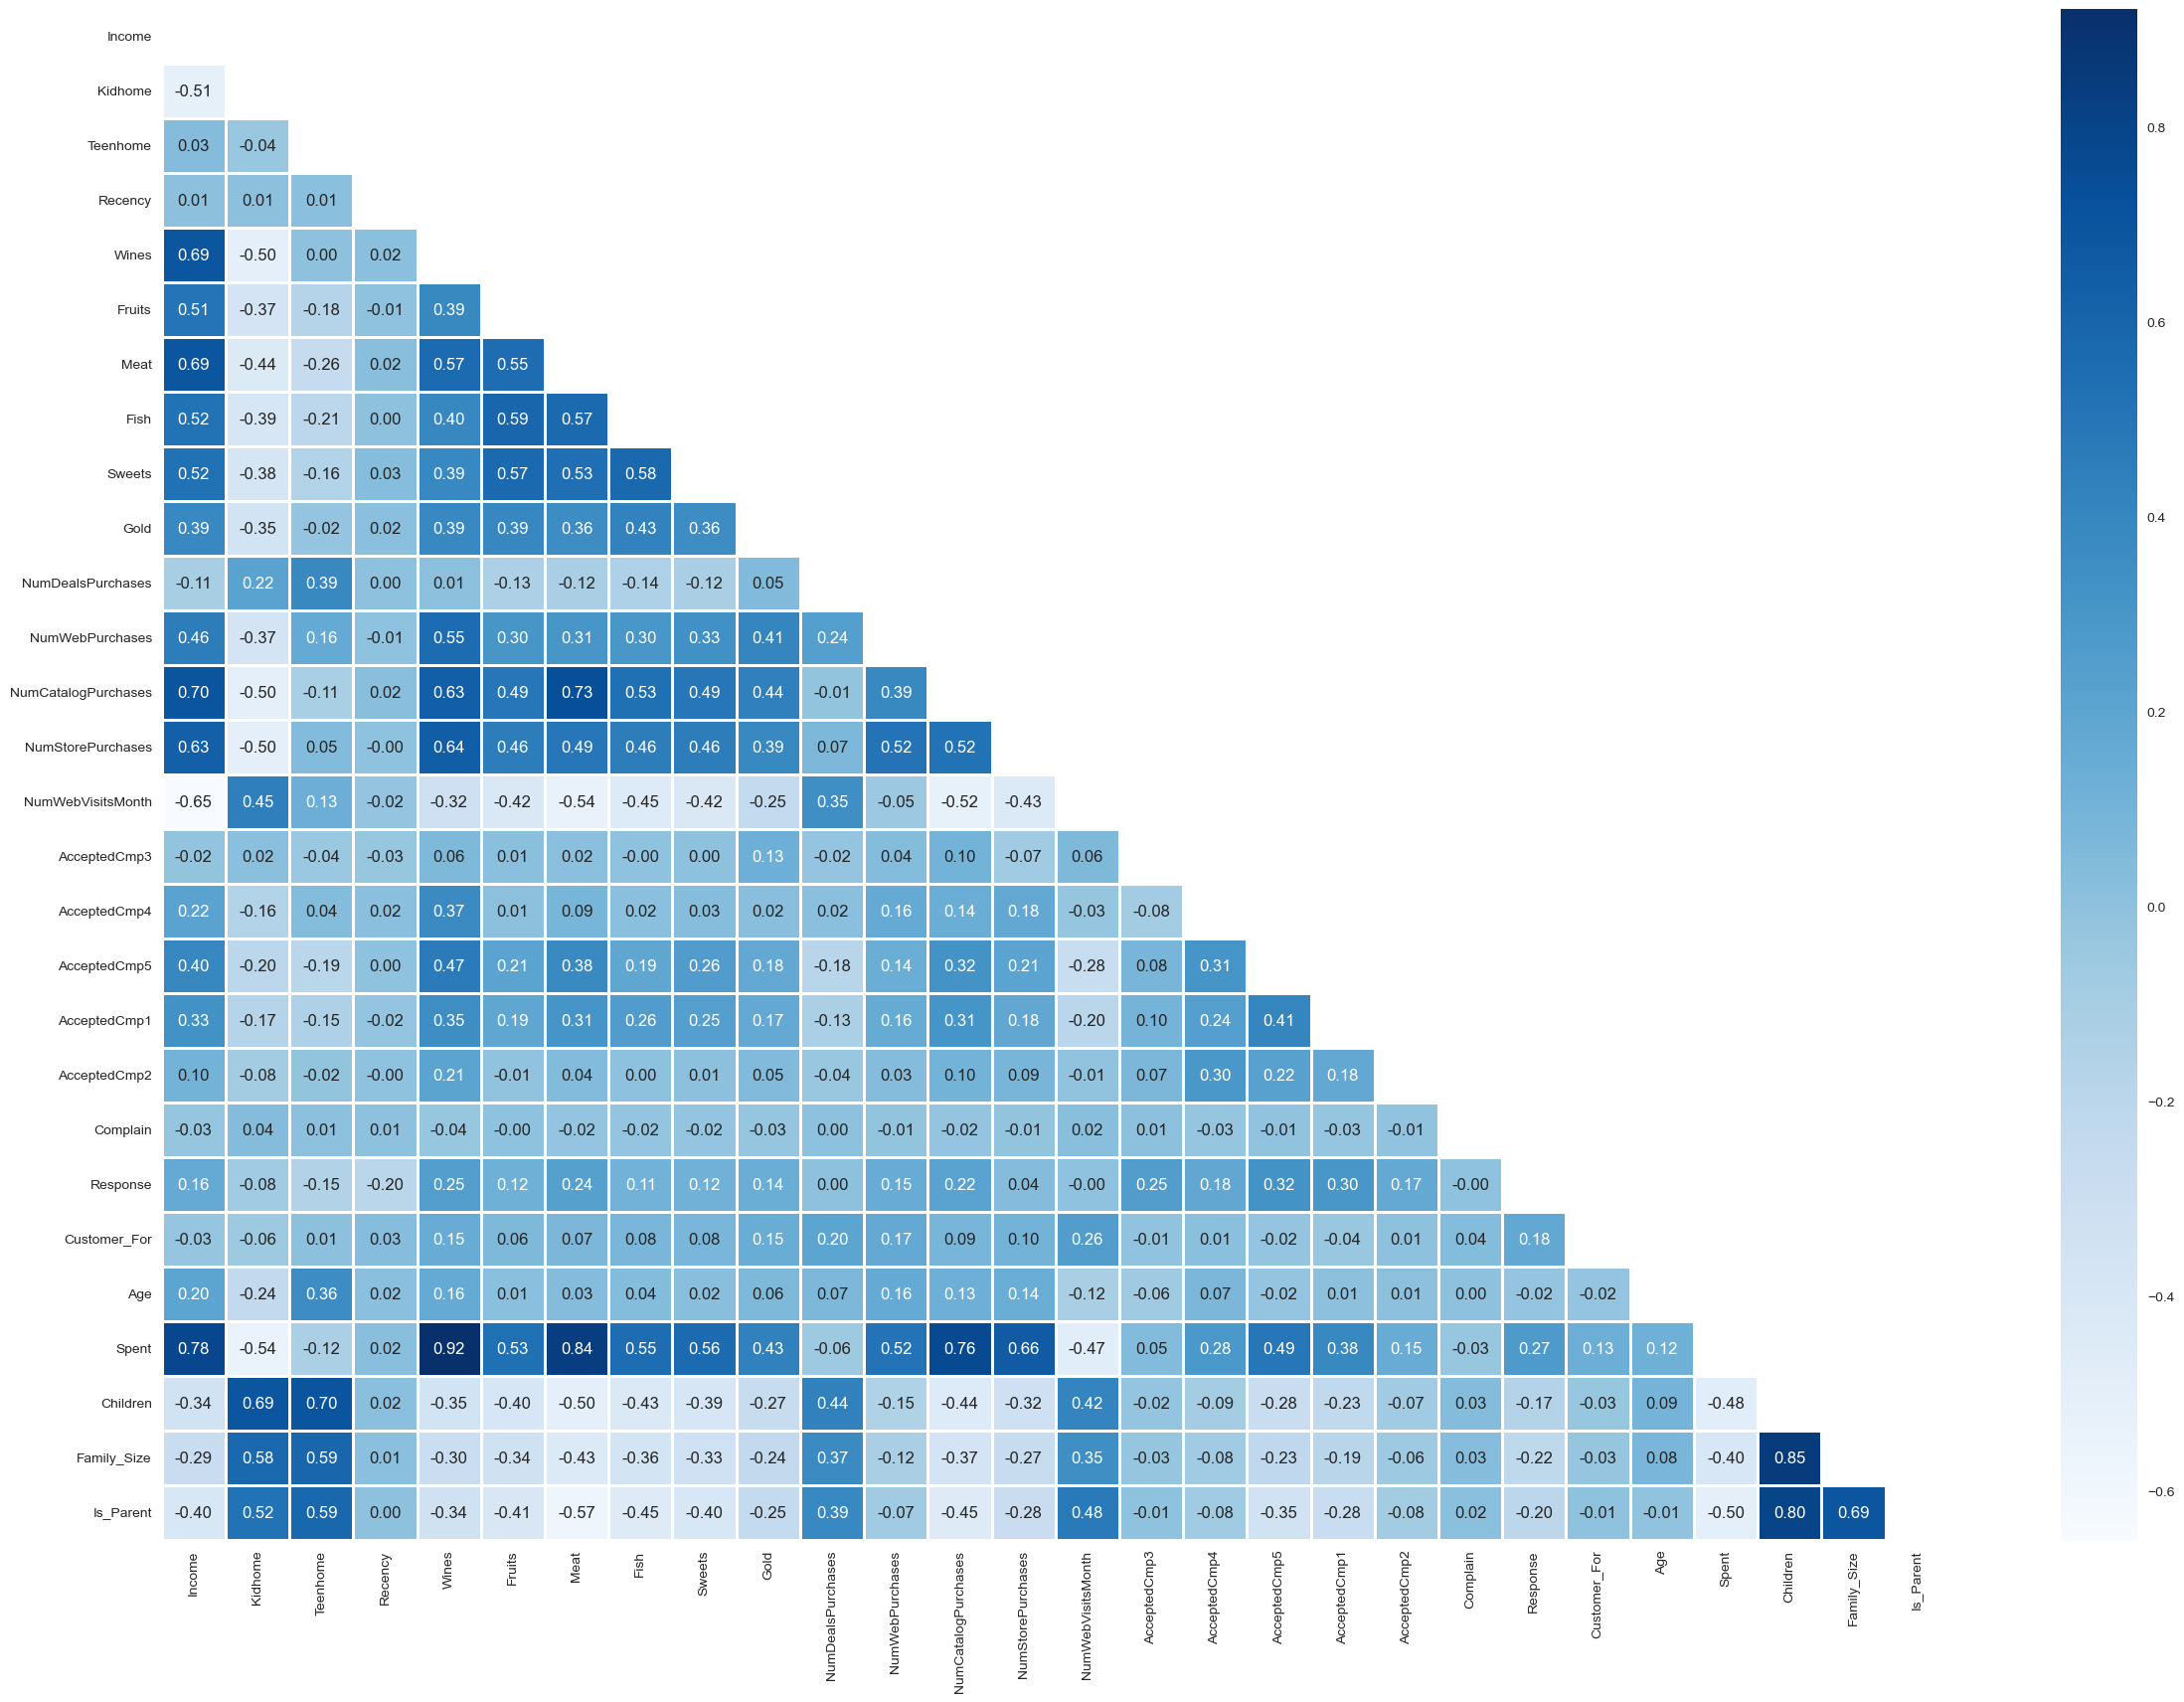

In [54]:
# Calculating the correlation matrix for the DataFrame
corr = df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(29, 20))
sns.heatmap(
    corr, 
    annot = True,           # Annotates each cell with the correlation coefficient
    fmt = '.2f',            # Formats the annotations to 2 decimal places
    linewidths = 0.725,     # Adds a line between cells
    linecolor = 'white',    # Color of the lines between cells
    mask = np.triu(corr),   # Masks the upper triangle of the heatmap to avoid redundancy
    cmap = 'Blues'          # Color map for the heatmap
)
plt.show()



### Getting the list of the categorical Varialbles



In [55]:
cat_cols = df.select_dtypes(include = ['object']).columns
for index, col_name in enumerate(cat_cols):
    print(index, col_name)

0 Education
1 Living_With


### Label Encoding the Categorical Columns

In [56]:
# Making the object of LabelEncoder

le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['Living_With'] = le.fit_transform(df['Living_With'])

In [57]:
df.dtypes.T

Education                int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Age                      int64
Spent                    int64
Living_With              int32
Children                 int64
Family_Size              int64
Is_Parent                int32
dtype: object

### Creating the copy of the Dataframe so that we will work on the subset of the data 

In [58]:
# creating the copy of the Dataframe so that we will work on the subset of the data 

main_data = df.copy()

In [59]:
df1 = main_data.copy()

### Working on the df dataframe

In [60]:
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],
       axis = 1, inplace = True)

### Scaling the Features

In [61]:
df.head(3)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,83894400000000000,67,1269,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,10800000000000000,70,18,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,40780800000000000,59,574,1,0,2,0


In [62]:
# Making the Object of the StandardScalar
sc = StandardScaler()

scaled_df = sc.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns = df.columns)


### The Scaled_df is the dataset that will be used further for modelling

In [63]:
scaled_df.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.475055,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.922564,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.143045,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.891899,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.347595,0.740959,0.069987,0.449070,0.632456


### Performing the PCA

In [64]:

# And Checking what value of k would be a greater fit

# Applying the PCA on the sacled_df
pca = PCA()
pca.fit(scaled_df)



PCA()

In [65]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
k = np.argmax(cumulative_variance >= 0.95) + 1  # Adding 1 because index starts at 0
print(f"Number of components explaining 95% variance: {k}")


Number of components explaining 95% variance: 16


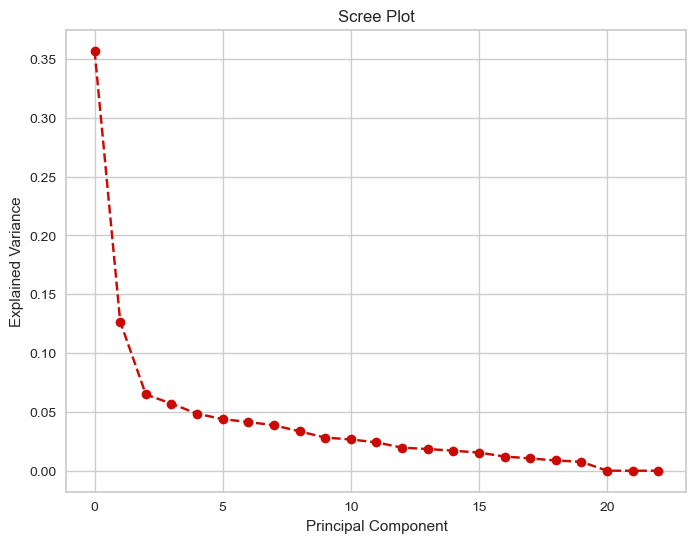

In [66]:
# Plot the scree plot (individual explained variance of each component)
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--', color='r')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### Initiating the PCA with k = 3 i.e 3 Components or 3 features

In [67]:
pca_final = PCA(n_components = 3)

PCA_df = pca_final.fit_transform(scaled_df)

PCA_df = pd.DataFrame(PCA_df, columns = (['col1', 'col2', 'col3']))

In [68]:
PCA_df.head()

,col1,col2,col3
0,4.924857,-0.178876,2.640461
1,-2.870149,-0.005666,-1.854966
2,2.581659,-0.739769,-0.249253
3,-2.667384,-1.545046,-0.944361
4,-0.662658,0.198950,-0.042353


In [69]:
PCA_df.shape

(2212, 3)

In [70]:
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-4.477030e-17,2.866484,-5.969137,-2.530161,-0.773689,2.376642,7.389946
col2,2212.0,-6.253788e-17,1.707979,-4.305986,-1.332012,-0.164487,1.236086,6.159214
col3,2212.0,-8.507360e-18,1.221531,-3.559267,-0.830710,-0.026092,0.810904,6.616523


### 3D Projection of the Data frame

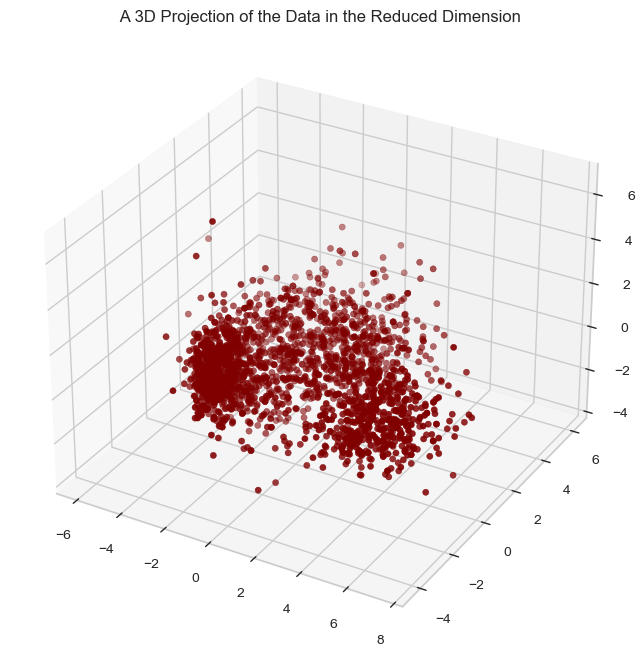

In [71]:
x = PCA_df['col1']
y = PCA_df['col2']
z = PCA_df['col3']

# To Plot

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'maroon', marker = 'o')
ax.set_title(' A 3D Projection of the Data in the Reduced Dimension')
plt.show()

C:\Users\Jeffrey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Jeffrey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Jeffrey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Jeffrey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

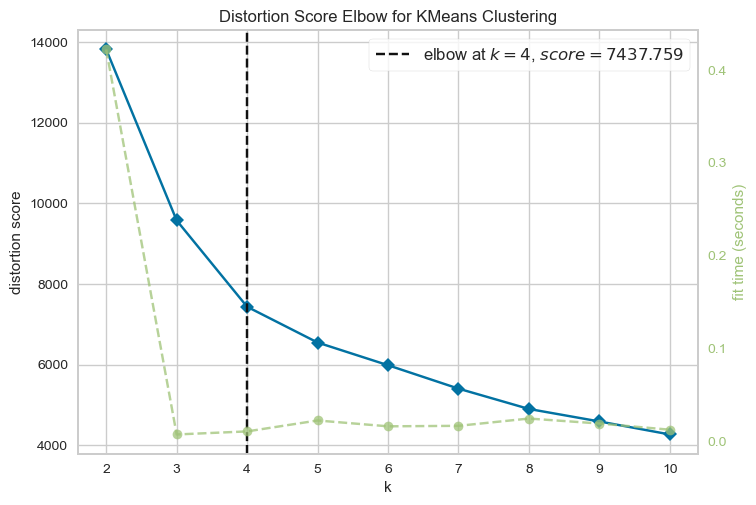

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Quick examination of elbow method to find numbers of clusters to make.

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

### Through the above graph we can understand that k = 4 i.e 4 clusters will give the better understandig of the data

In [73]:
k = KMeans(n_clusters = 4)
k.fit(PCA_df)

C:\Users\Jeffrey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=4)

In [74]:
# Getting the clusters values and adding them into the variable

cluster_points = k.labels_

In [75]:
# Getting the Sillhoute score

silhouette_score(PCA_df, k.labels_)

0.37623688293238366

### The Score for the model os 4.6 so it is considered to be a good model

In [76]:
# Adding the Cluster points to the original dataset

df['Clusters'] = cluster_points

In [77]:
df.shape

(2212, 24)

## Evaluating the Models

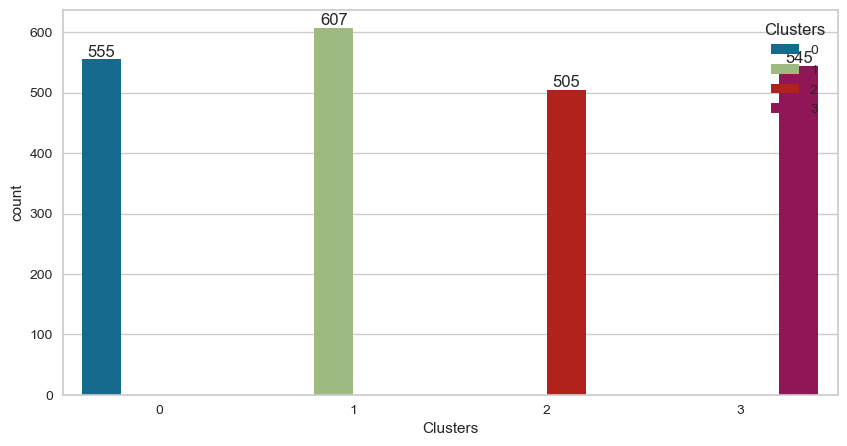

In [78]:
# Getting the plot of the Cluster

viz_bar(df, 'Clusters', 'Clusters')

<AxesSubplot:xlabel='Spent', ylabel='Income'>

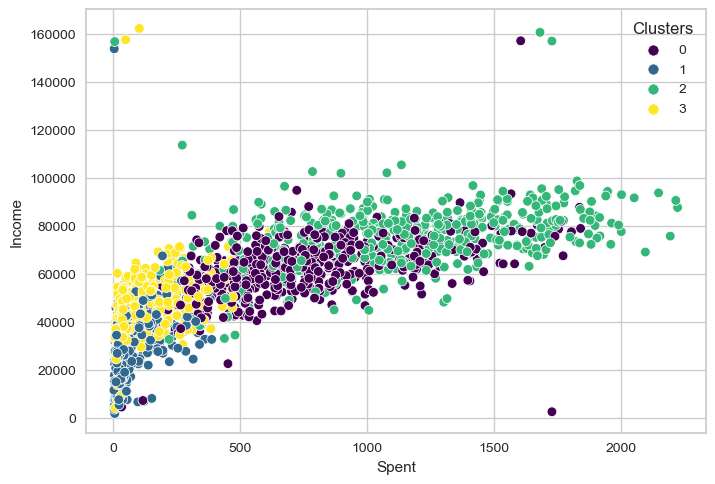

In [79]:
sns.scatterplot(data = df, x = 'Spent', y = 'Income', hue = 'Clusters', palette = 'viridis')

### Income vs spending plot shows the clusters pattern

> group 0: high spending & average income

> group 1: low spending & low income

> group 2: high spending & high income

> group 3: high spending & low income

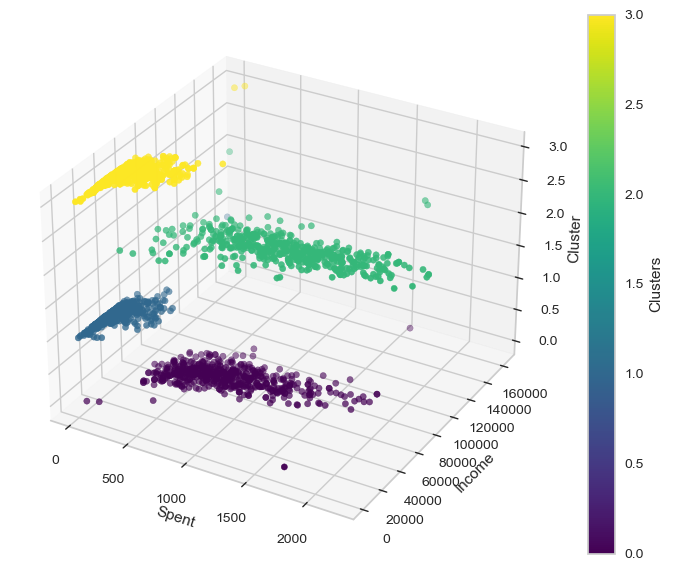

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your DataFrame is 'df' and the columns are 'Spent', 'Income', 'Savings', and 'Clusters'
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
scatter = ax.scatter(df['Spent'], df['Income'], df['Clusters'], c=df['Clusters'], cmap='viridis')

# Adding labels
ax.set_xlabel('Spent')
ax.set_ylabel('Income')
ax.set_zlabel('Cluster')

# Add a color bar for the clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Clusters')

# Show the plot
plt.show()


### Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


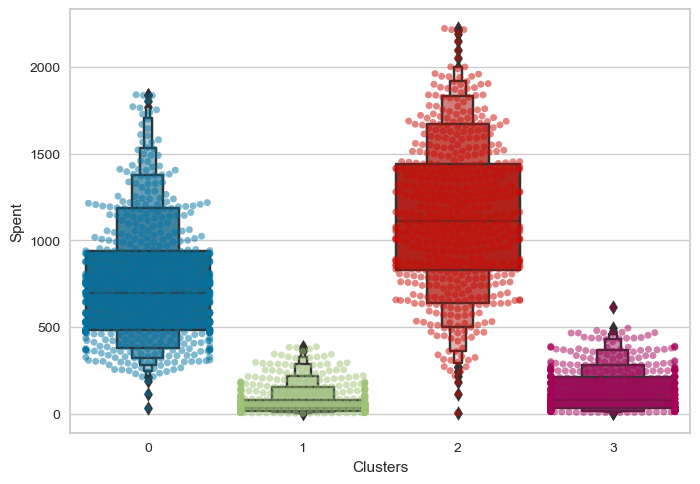

In [81]:
plt.figure()
pl = sns.swarmplot(data = df, x = 'Clusters', y = 'Spent', alpha = 0.5)
pl = sns.boxenplot(data = df, x = 'Clusters', y = 'Spent')
plt.show()

### From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

### Lets see how did or campaigns do in the past

In [84]:
main_data['Clusters'] = cluster_points

In [85]:
main_data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters'],
      dtype='object')

In [88]:
main_data['Total_Promos'] = main_data['AcceptedCmp1'] + main_data['AcceptedCmp2']
+ main_data['AcceptedCmp3'] +main_data['AcceptedCmp4'] + main_data['AcceptedCmp5']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Length: 2212, dtype: int64

In [90]:
main_data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters', 'Total_Promos'],
      dtype='object')

In [94]:
main_data['Total_Promos'].value_counts()

0    2053
1     146
2      13
Name: Total_Promos, dtype: int64

<AxesSubplot:xlabel='Total_Promos', ylabel='count'>

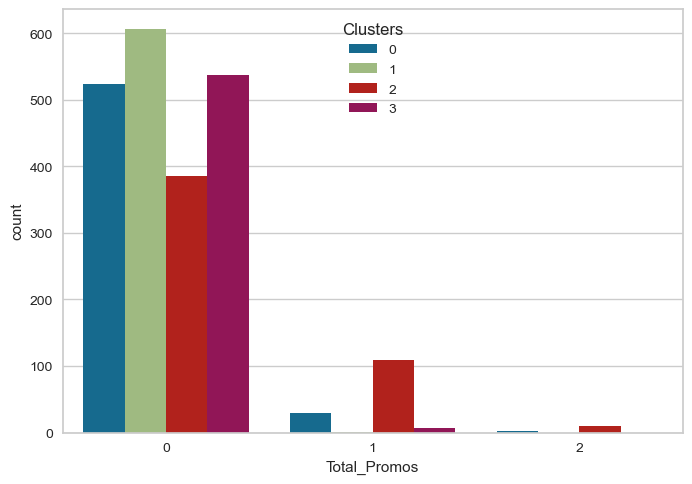

In [98]:
sns.countplot(data = main_data, x = 'Total_Promos', hue = 'Clusters')

> __There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 3 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.__

### Plotting where the purchases are made through Deals

C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Clusters', ylabel='NumDealsPurchases'>

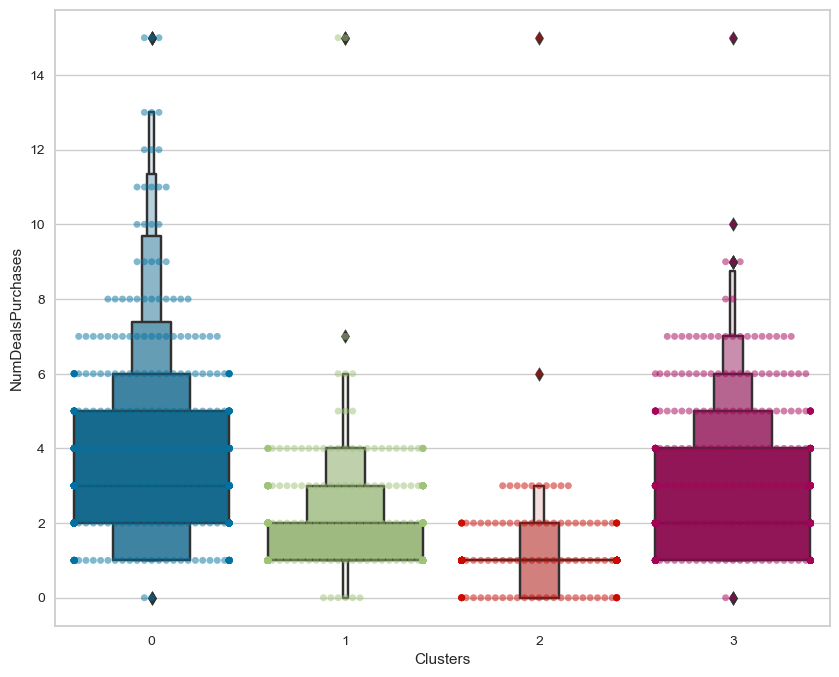

In [111]:
plt.figure(figsize = (10, 8))
sns.swarmplot(data = df, x = 'Clusters', y = 'NumDealsPurchases', alpha = 0.5)
sns.boxenplot(data = main_data, y = 'NumDealsPurchases', x = 'Clusters')

> __Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 1 overwhelmingly__

### Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

### To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

In [115]:

# Making the Dataframe called Personal so that we can iterate through it and we can sse the plots that we have 
# to make in order to come to the conclusion
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]


C:\Users\Jeffrey\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

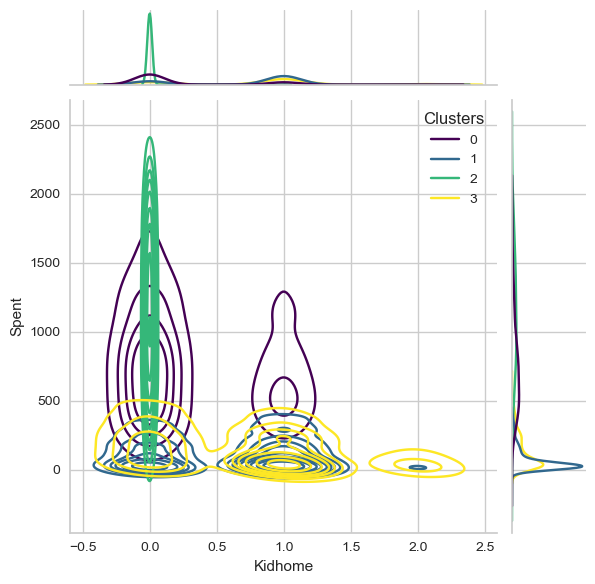

<Figure size 800x550 with 0 Axes>

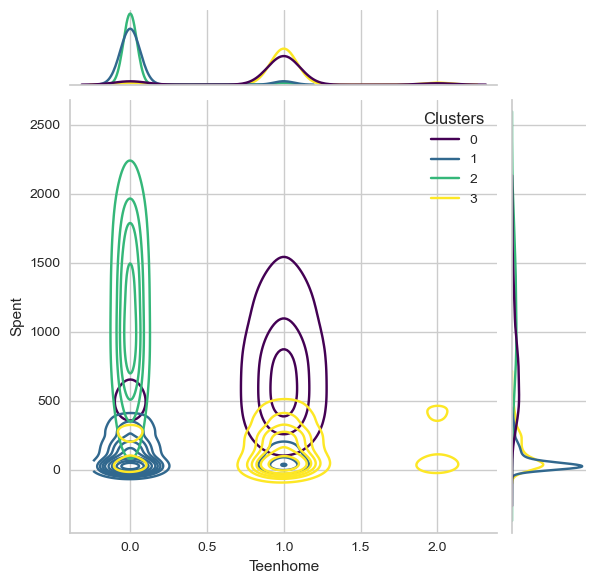

<Figure size 800x550 with 0 Axes>

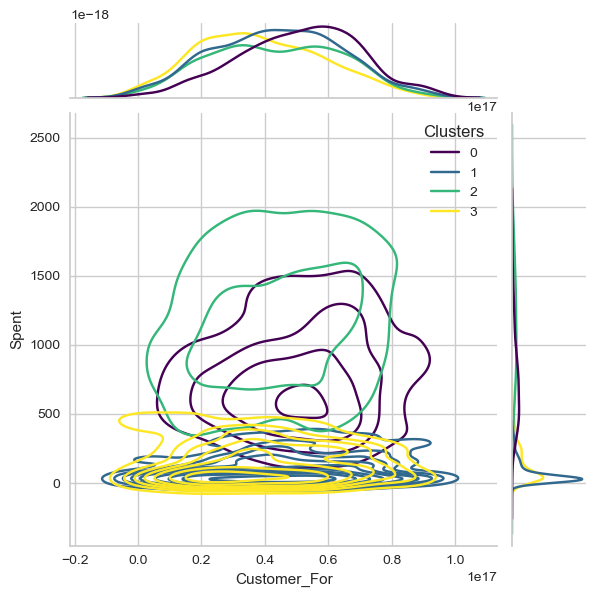

<Figure size 800x550 with 0 Axes>

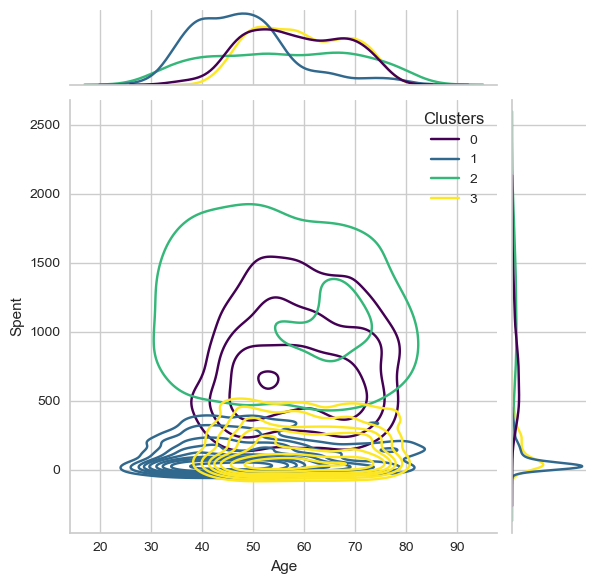

<Figure size 800x550 with 0 Axes>

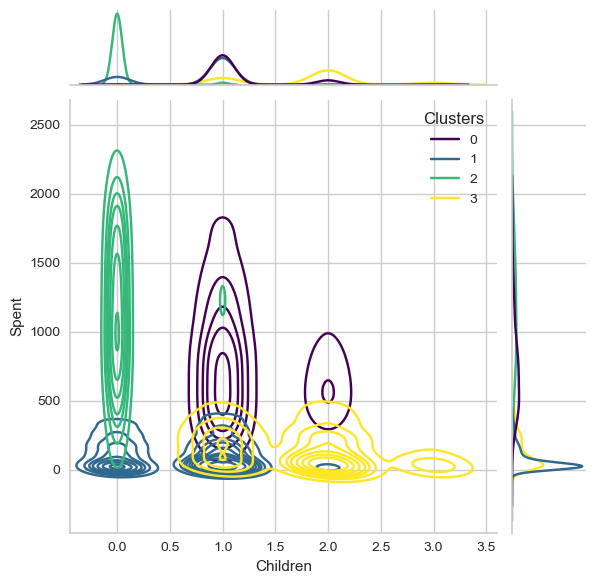

<Figure size 800x550 with 0 Axes>

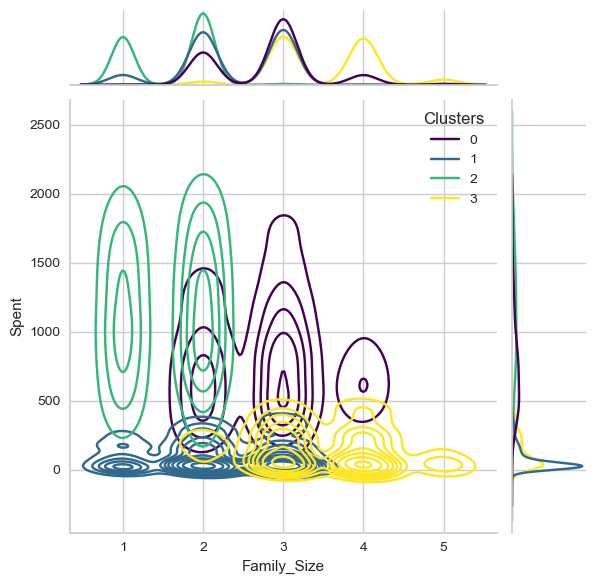

<Figure size 800x550 with 0 Axes>

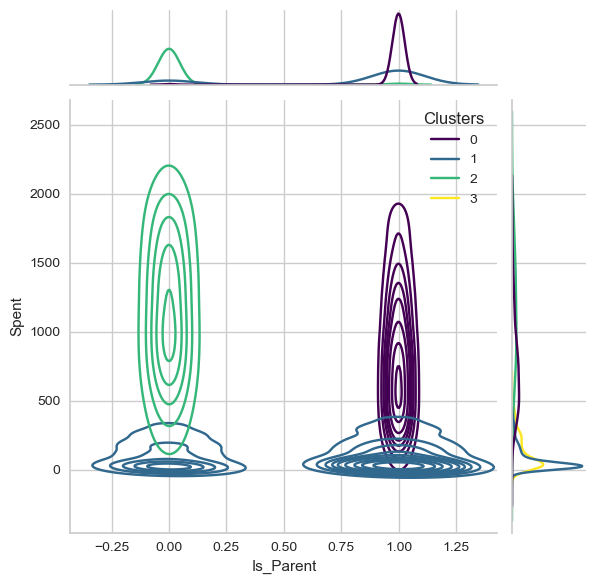

<Figure size 800x550 with 0 Axes>

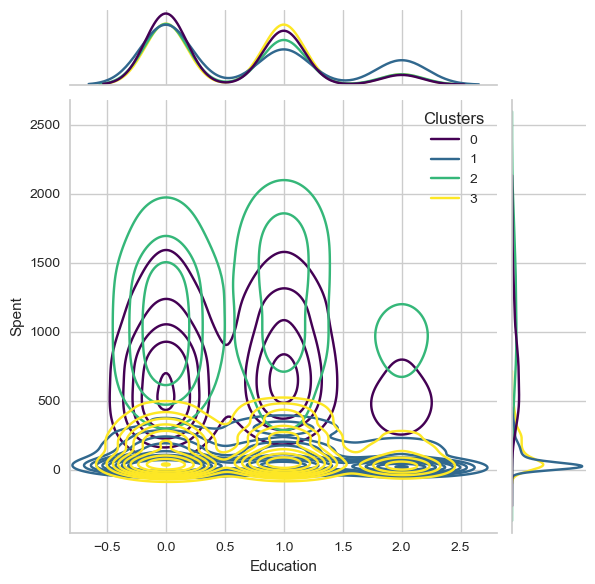

<Figure size 800x550 with 0 Axes>

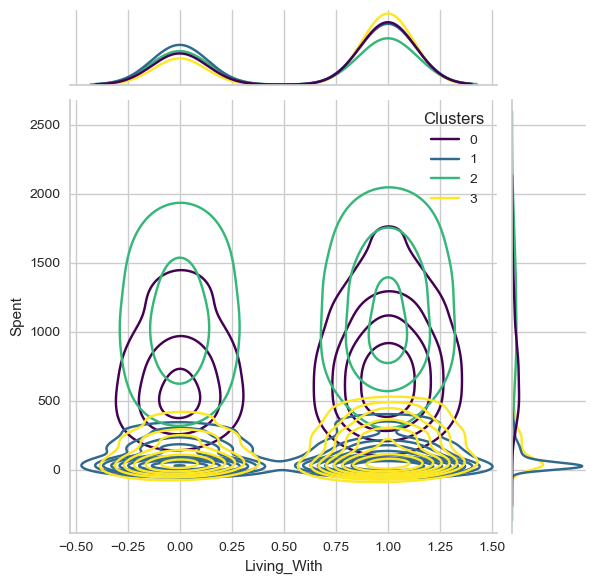

In [128]:
for i in Personal:
    plt.figure()
    sns.jointplot(x = main_data[i], y = main_data['Spent'], hue = main_data['Clusters'], kind = 'kde', palette = 'viridis')
    plt.show

| **Cluster**   | **Description** |
|     :---      |       :---      |
| **Cluster 0** | 👨‍👩‍👧‍👦 **Definitely parents**<br>👨‍👩‍👦 Family size: 2 to 4 members<br>👩‍👧‍👦 Includes single parents<br>🧑‍🦱 Teenagers at home<br>👵 Relatively older |
| **Cluster 1** | ❌ **Not parents**<br>👫 Family size: max 2 members<br>🧑‍🤝‍🧑 Couples > Singles<br>🌍 Spans all ages<br>💵 High-income group |
| **Cluster 2** | 👨‍👩‍👧 **Majority parents**<br>👨‍👩‍👧 Family size: max 3 members<br>👶 Have younger children (not teenagers)<br>🧑 Relatively younger |
| **Cluster 3** | 👨‍👩‍👧‍👦 **Definitely parents**<br>👨‍👩‍👧‍👦 Family size: 2 to 5 members<br>🧒 Teenagers at home<br>👴 Relatively older<br>💰 Lower-income group |


<iframe src="https://www.kaggle.com/embed/karnikakapoor/customer-segmentation-clustering?cellIds=58&kernelSessionId=76592997" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Customer Segmentation: Clustering 🛍️🛒🛒"></iframe>

<h2 style="color: #4CAF50;">📊 Project Overview: Unsupervised Clustering</h2>

<p style="font-size: 16px; line-height: 1.6;">
In this project, I performed <strong>unsupervised clustering</strong> using <span style="color: #FF5733;">dimensionality reduction</span> followed by <span style="color: #FF5733;">KMeans Clustering</span>. I identified <strong>4 distinct clusters</strong> of customers and analyzed their profiles based on family structures, income, and spending patterns. This analysis can be valuable for planning <em>better marketing strategies</em> and understanding customer behavior.
</p>

<h3 style="color: #4CAF50;">🔍 Key Highlights:</h3>
<ul style="font-size: 16px; line-height: 1.8;">
    <li>✅ Dimensionality reduction techniques to simplify data.</li>
    <li>✅ Use of <strong>KMeans Clustering</strong> for customer segmentation.</li>
    <li>✅ <span style="color: #FF5733;">4 clusters</span> identified with distinct family and income/spending profiles.</li>
    <li>✅ Practical insights for optimizing <strong>marketing strategies</strong>.</li>
</ul>

<h3 style="color: #4CAF50;">💡 Insights Gained:</h3>
<p style="font-size: 16px; line-height: 1.6;">
The clustering process revealed important segments of customers with different characteristics. By focusing on their family sizes and spending patterns, we can devise more targeted marketing campaigns and improve customer satisfaction.
</p>
